First 5 rows:
         Date                   Transaction Description      Category  \
0  2020-01-02                               Score each.  Food & Drink   
1  2020-01-02                       Quality throughout.     Utilities   
2  2020-01-04        Instead ahead despite measure ago.          Rent   
3  2020-01-05  Information last everything thank serve.    Investment   
4  2020-01-13              Future choice whatever from.  Food & Drink   

    Amount     Type Payment_Mode     Account_Type    Month  Year       Day  \
0  1485.69  Expense   Debit Card  Savings Account  January  2020  Thursday   
1  1475.58  Expense  Credit Card           Wallet  January  2020  Thursday   
2  1185.08  Expense   Debit Card  Savings Account  January  2020  Saturday   
3  2291.00   Income   Debit Card  Current Account  January  2020    Sunday   
4  1126.88  Expense          UPI  Current Account  January  2020    Monday   

  Transaction_Flag High_Value  
0          Outflow         No  
1          Out

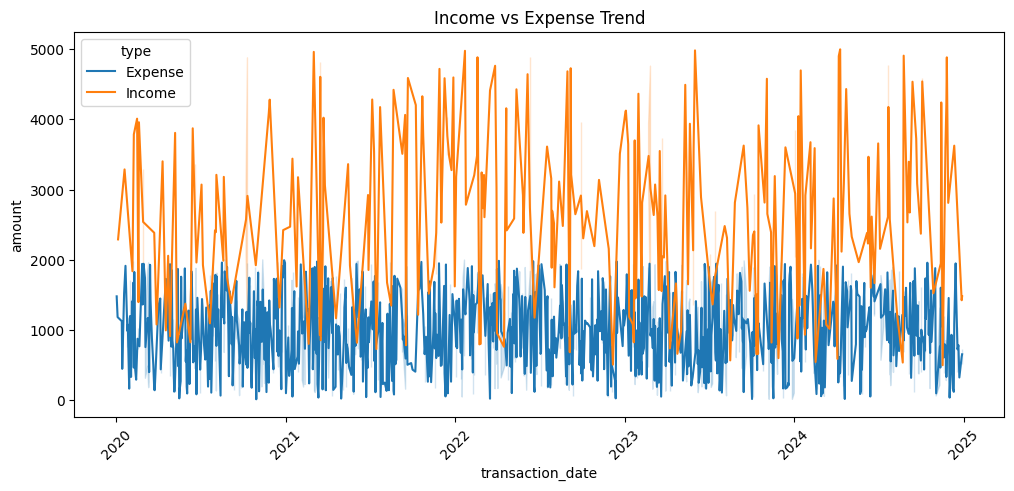

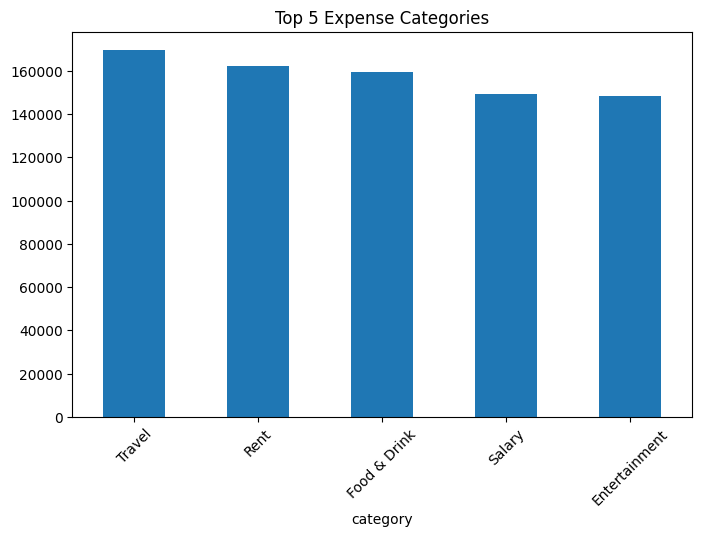

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"C:\Users\Dell\OneDrive\Desktop\Personal Finance and Investment Analytics System\Updated_Personal_Finance_Dataset.csv"
df = pd.read_csv(file_path)
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
df.rename(columns={
    'Date': 'transaction_date',
    'Transaction Description': 'description',
    'Category': 'category',
    'Amount': 'amount',
    'Type': 'type'
}, inplace=True)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
total_income = df[df['type'] == 'Income']['amount'].sum()
total_expense = df[df['type'] == 'Expense']['amount'].sum()
print("\nTotal Income:", total_income)
print("Total Expense:", total_expense)
print("Net Savings:", total_income - total_expense)
df['Month'] = df['transaction_date'].dt.to_period('M')
monthly_summary = df.groupby(['Month', 'type'])['amount'].sum().unstack()
print("\nMonthly Summary:")
print(monthly_summary)
category_expense = df[df['type'] == 'Expense'].groupby('category')['amount'].sum().sort_values(ascending=False)
print("\nCategory-wise Expense:")
print(category_expense)
print("\nTop 5 Expense Categories:")
print(category_expense.head())
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x='transaction_date', y='amount', hue='type')
plt.title("Income vs Expense Trend")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8,5))
category_expense.head(5).plot(kind='bar')
plt.title("Top 5 Expense Categories")
plt.xticks(rotation=45)
plt.show()